In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.datasets import make_moons

np.random.seed(0)

(200, 2) (200,)


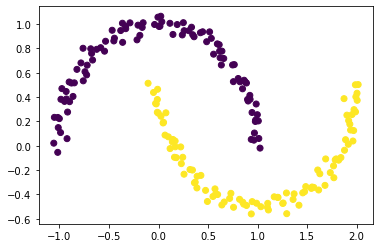

In [3]:
data, labels = make_moons(n_samples=200,noise = 0.04,random_state=0)
print(data.shape, labels.shape)
color_map = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow"])
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

a1(preactivation) is calculated first and then h1(activation) is calculated

a1 is a weighted sum of inputs

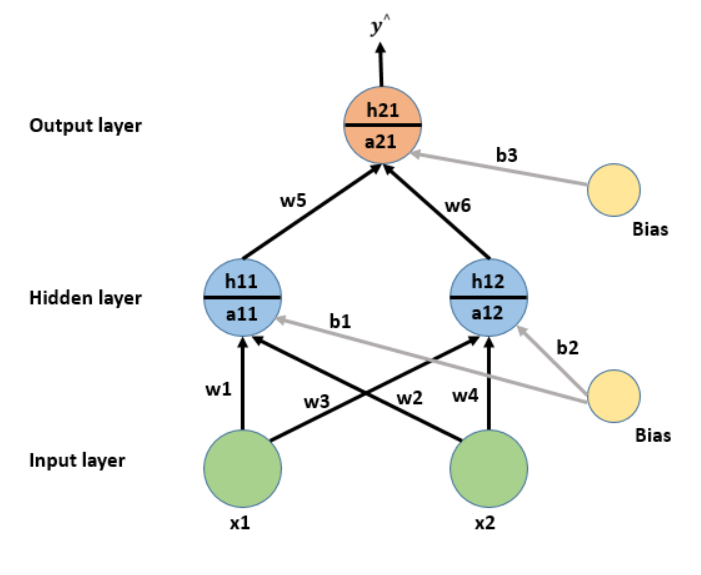

In [4]:
from sklearn.model_selection import train_test_split
#Splitting the data into training and testing data
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(150, 2) (50, 2)


In [5]:
class FeedForwardNetwork:
 
 #Creating random numbers to use for weights
 def __init__(self):
     np.random.seed(0)
     self.w1 = np.random.randn()
     self.w2 = np.random.randn()
     self.w3 = np.random.randn()
     self.w4 = np.random.randn()
     self.w5 = np.random.randn()
     self.w6 = np.random.randn()
     self.b1 = 0
     self.b2 = 0
     self.b3 = 0
 
 #creating activation function
 def sigmoid(self, x):
     return 1.0/(1.0 + np.exp(-x))
 
 #intialising weights with random number
 #calculates the output value for the given input observation
 def forward_pass(self, x):
     self.x1, self.x2 = x
     self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
     self.h1 = self.sigmoid(self.a1)
     self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
     self.h2 = self.sigmoid(self.a2)
     self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
     self.h3 = self.sigmoid(self.a3)
    
     #forward_matrix is a 2d array to store the values of a1, h1, a2, h2, a3, h3, etc for each observation.
     forward_matrix = np.array([[0,0,0,0,self.h3,0,0,0], 
                      [0,0,(self.w5*self.h1),        (self.w6*self.h2),self.b3,self.a3,0,0],
                      [0,0,0,self.h1,0,0,0,self.h2],
                      [(self.w1*self.x1), (self.w2*self.x2),         self.b1, self.a1,(self.w3*self.x1),(self.w4*self.x2), self.b2,  self.a2]])
     forward_matrices.append(forward_matrix)
     return self.h3

In [6]:
#iterating the train data through feedforward network
forward_matrices = []
ffn = FeedForwardNetwork()
for x in X_train:
   ffn.forward_pass(x)

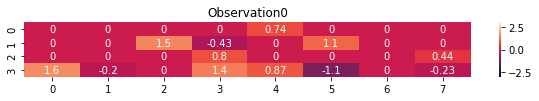

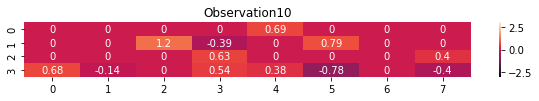

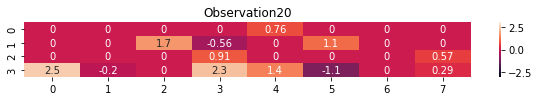

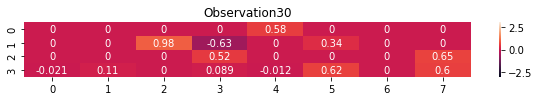

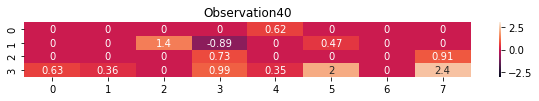

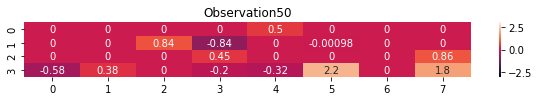

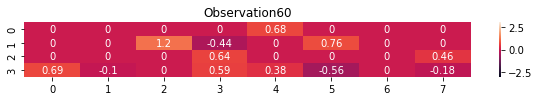

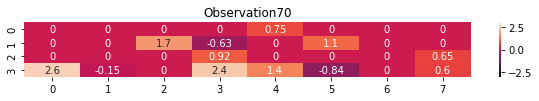

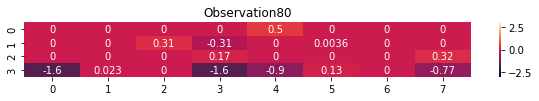

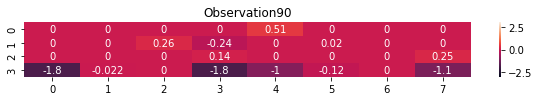

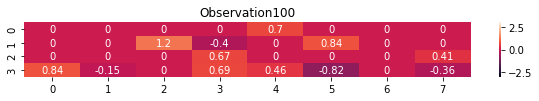

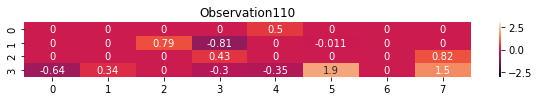

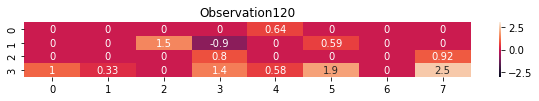

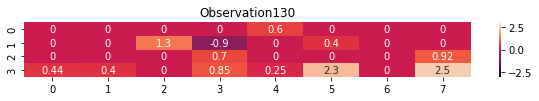

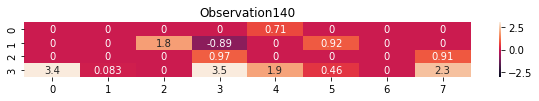

In [9]:
#creating a heatmap gif which shows the output from the input
import seaborn as sns
import imageio
from IPython.display import HTML

def plot_heat_map(observation):
    fig = plt.figure(figsize=(10, 1))
    sns.heatmap(forward_matrices[observation], annot=True,vmin=-3, vmax=3)
    plt.title("Observation"+str(observation))
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] +             (3,))
    return image
imageio.mimsave('./forwardpropagation_viz.gif', [plot_heat_map(i) for i in range(0,len(forward_matrices),len(forward_matrices)//15)], fps=1)